In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
import scipy.stats
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

## Loading The Data

In [2]:
#loading data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

#looking into data
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.info 

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [5]:
df_test.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Ut

In [6]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

average sales = 180,921 

Maximum Price = 755,000, While Minimum Price = 34,900

## Exploratory Data Analysis

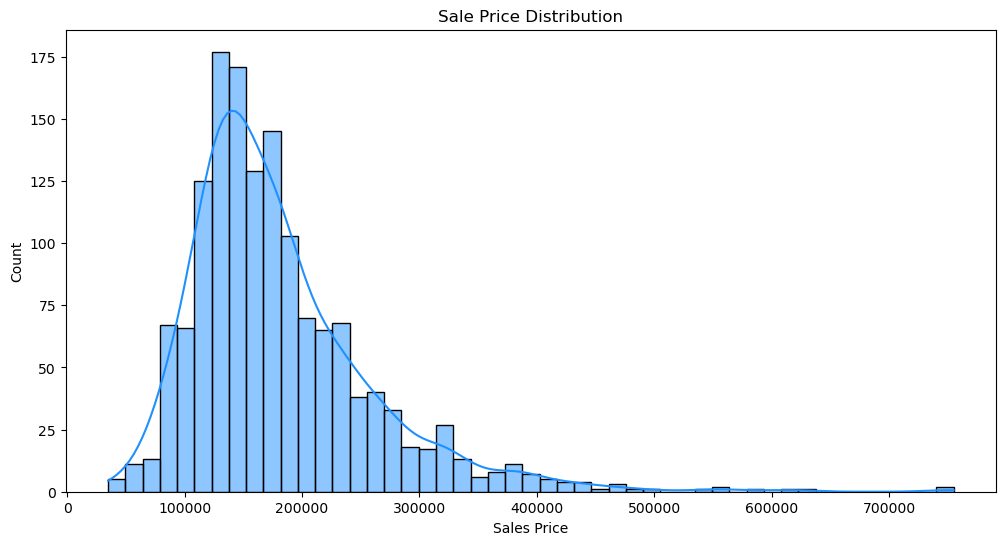

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(df_train['SalePrice'], kde=True, color='dodgerblue')
plt.xlabel('Sales Price')
plt.title('Sale Price Distribution')
plt.show()

It's obvious that the dependent feature ‘SalePrice’ is right-skewed.

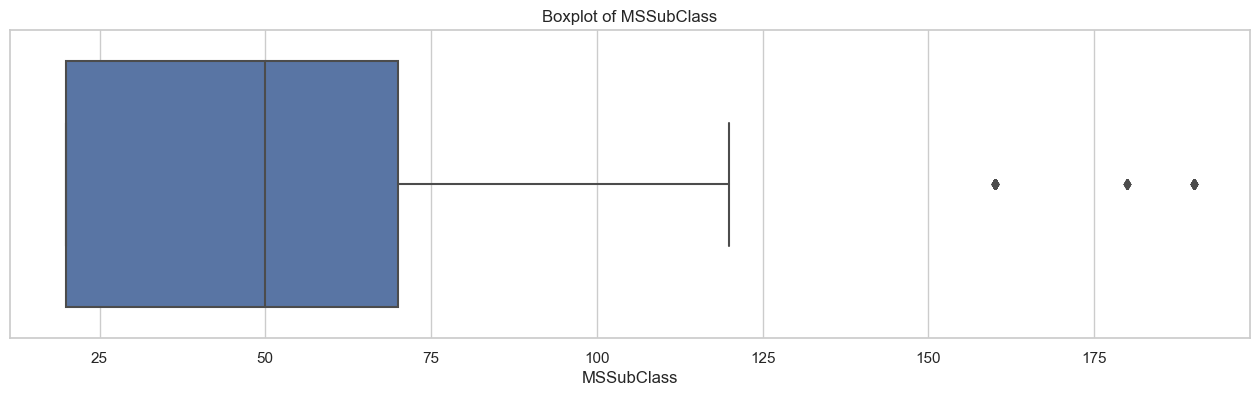

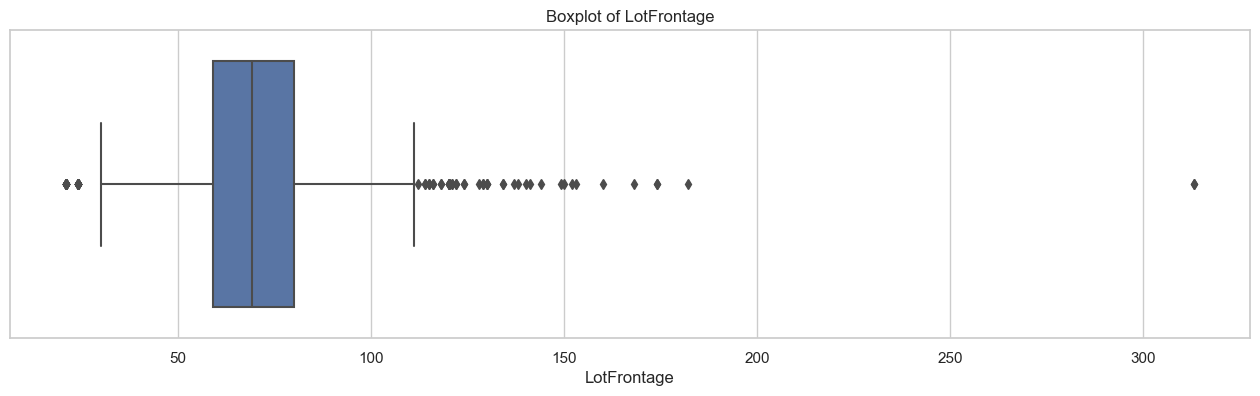

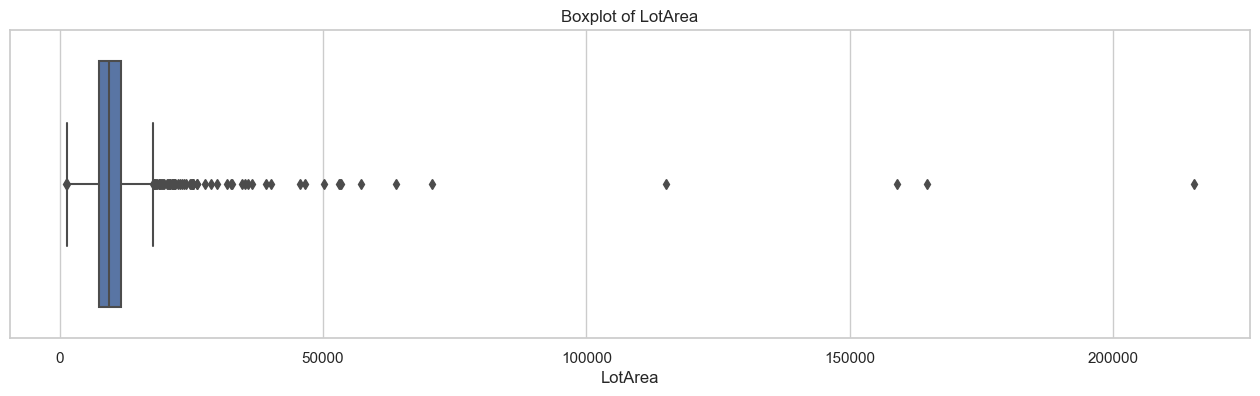

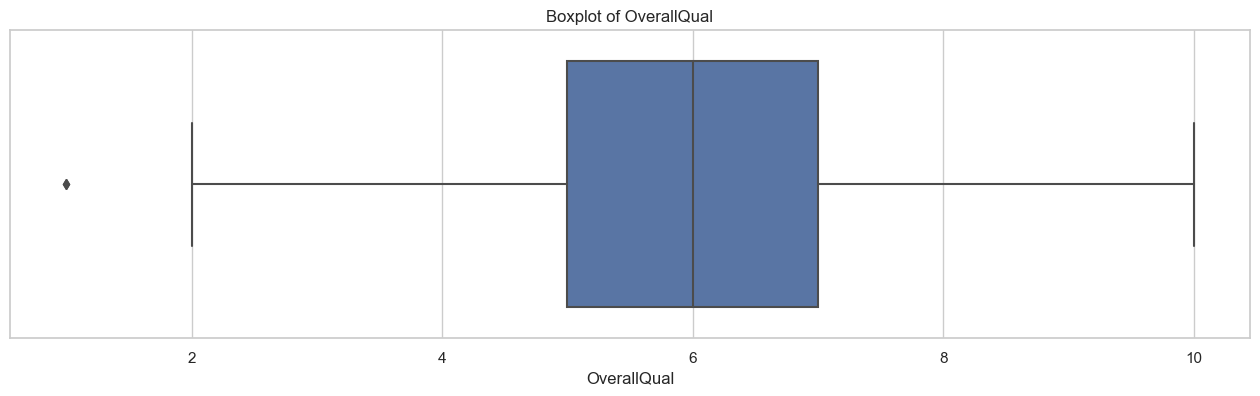

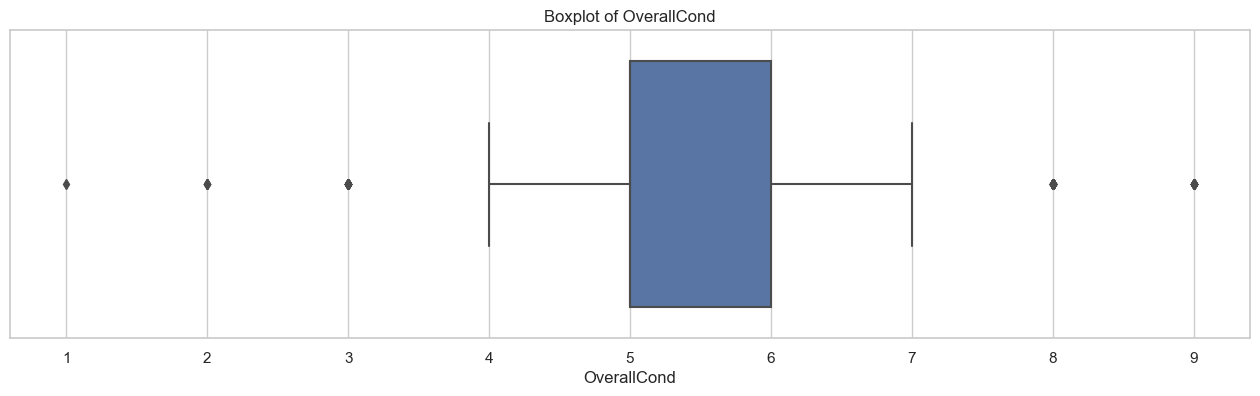

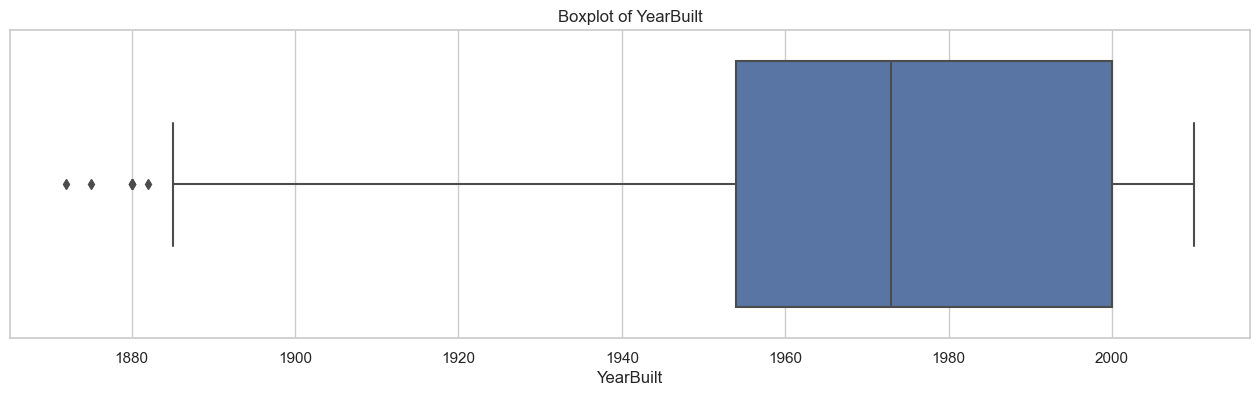

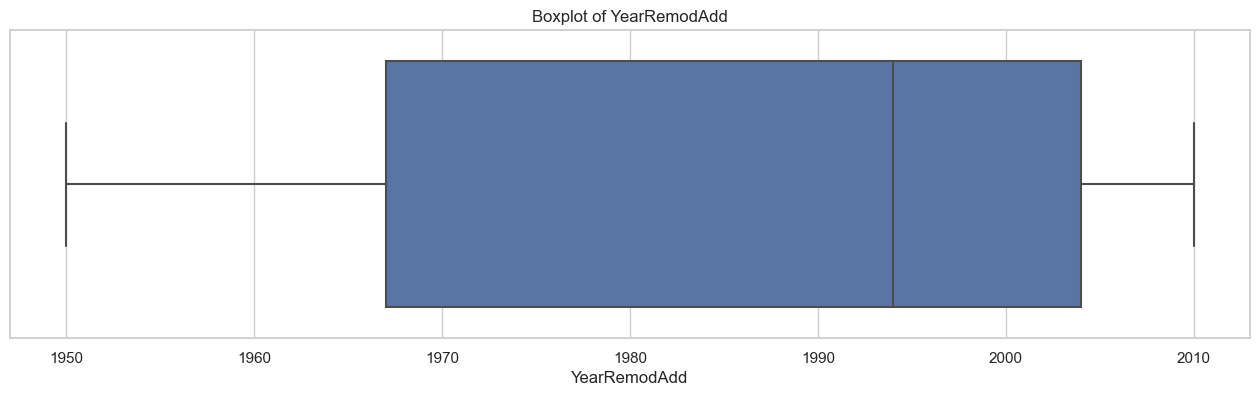

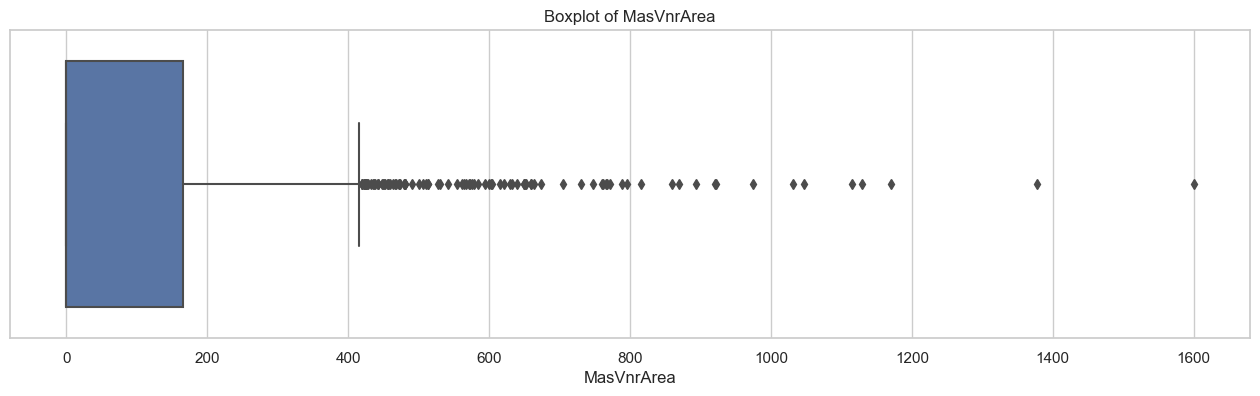

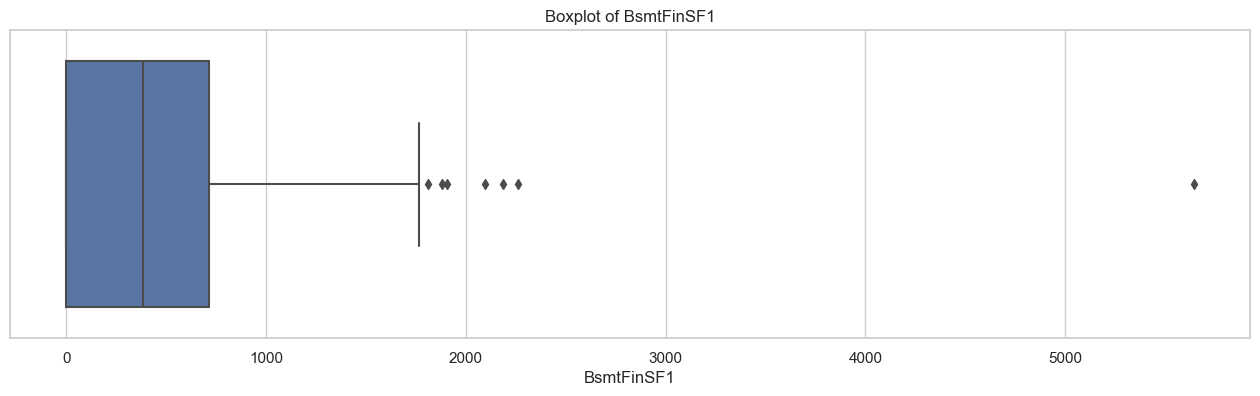

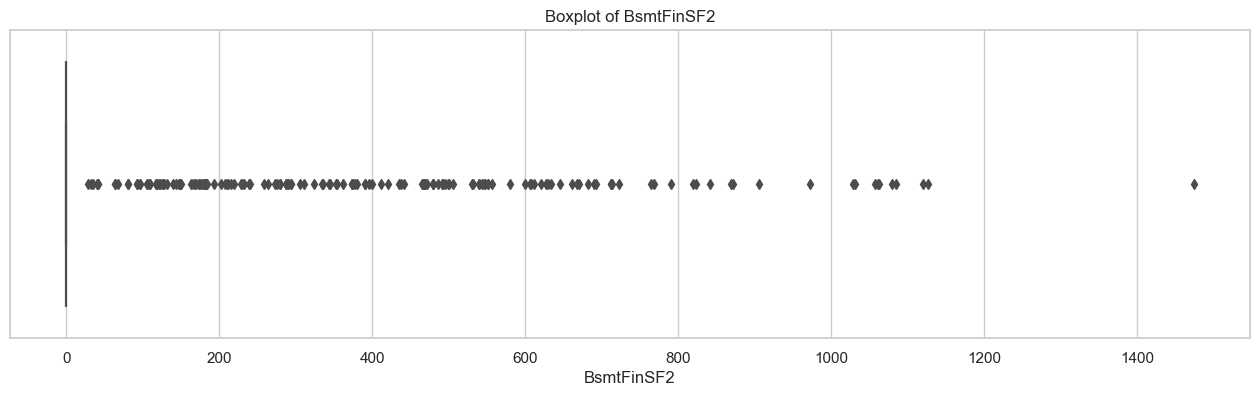

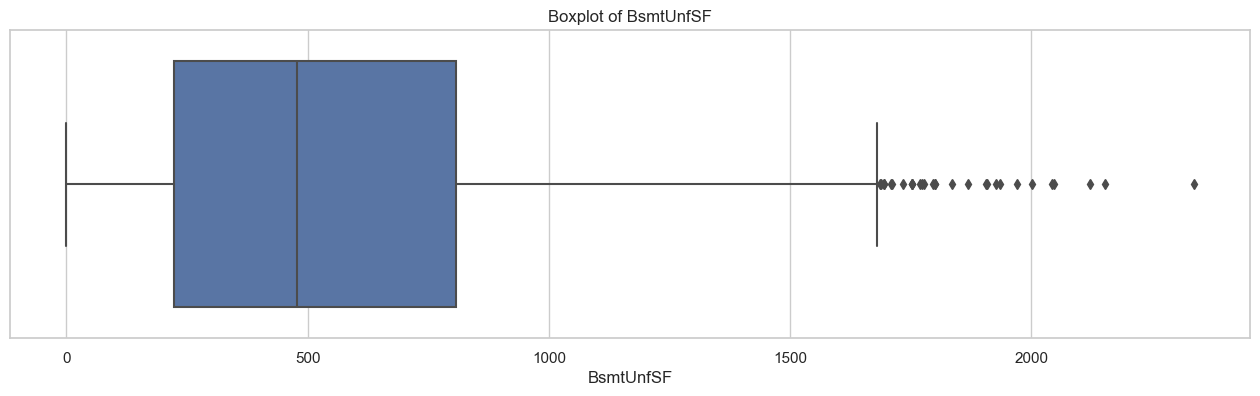

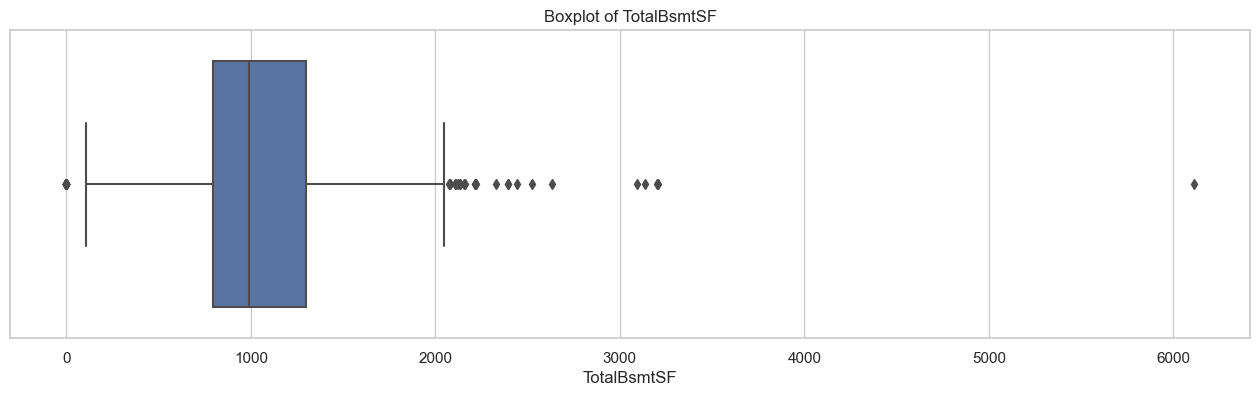

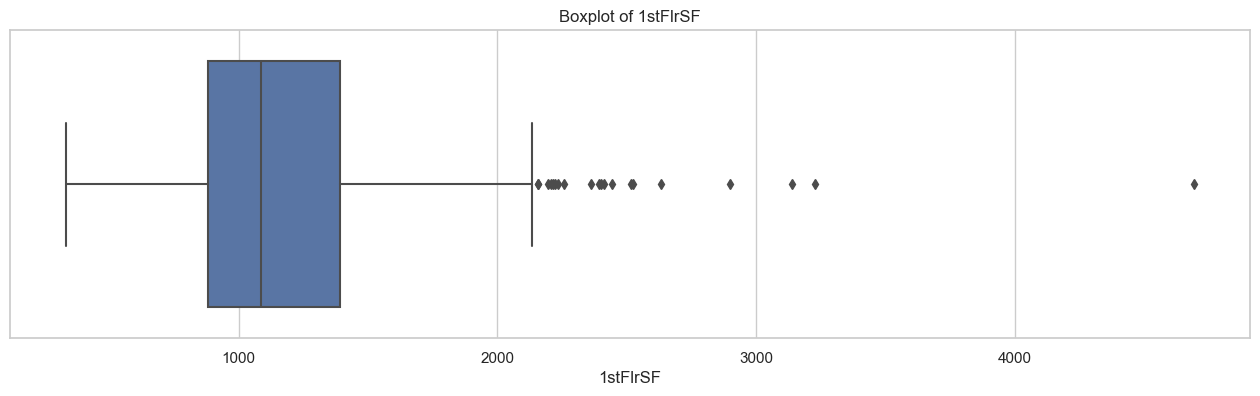

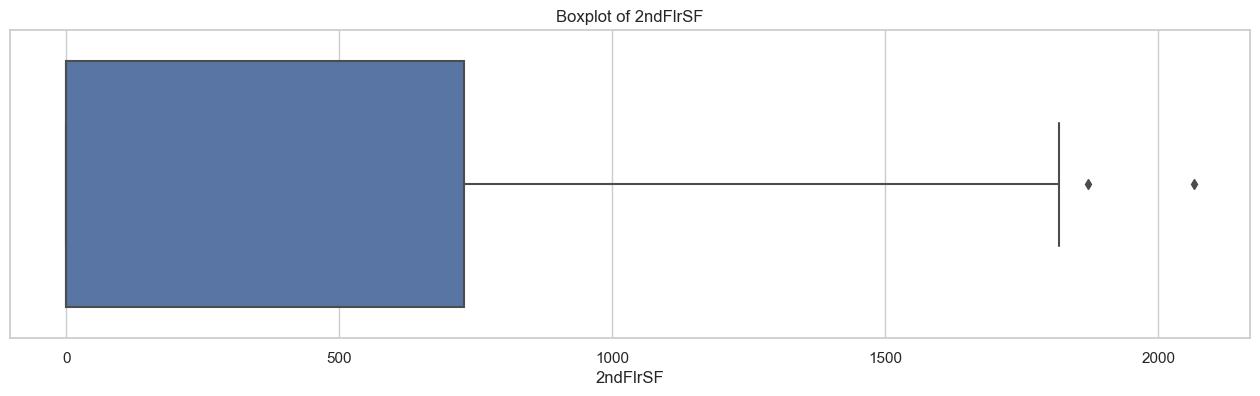

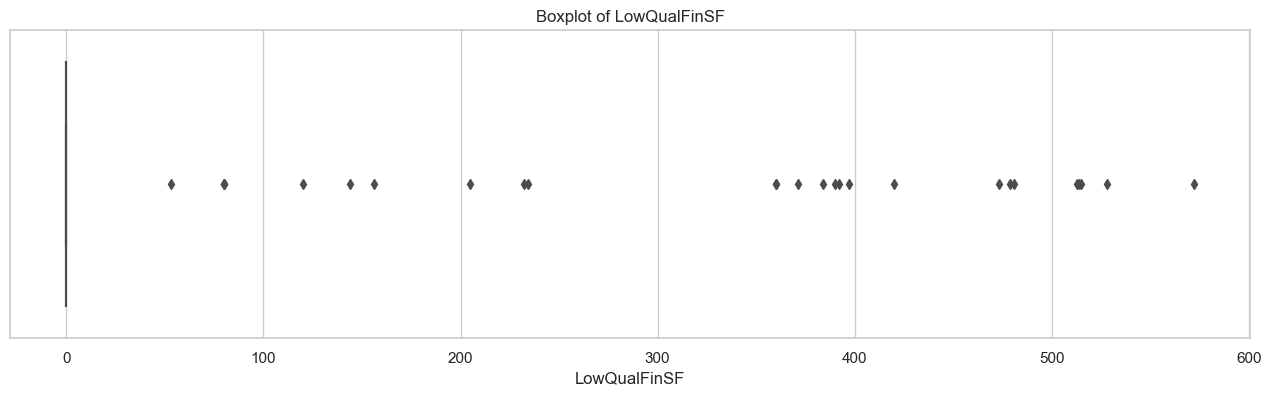

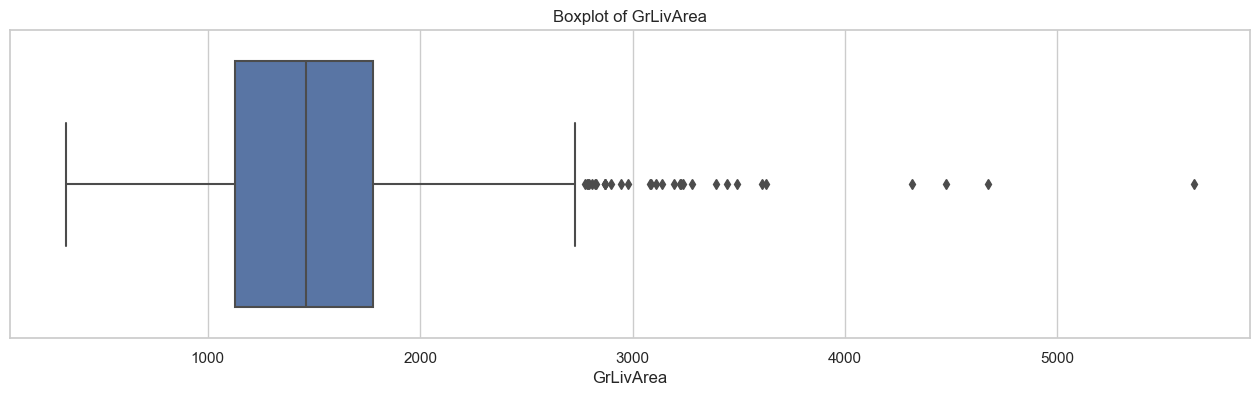

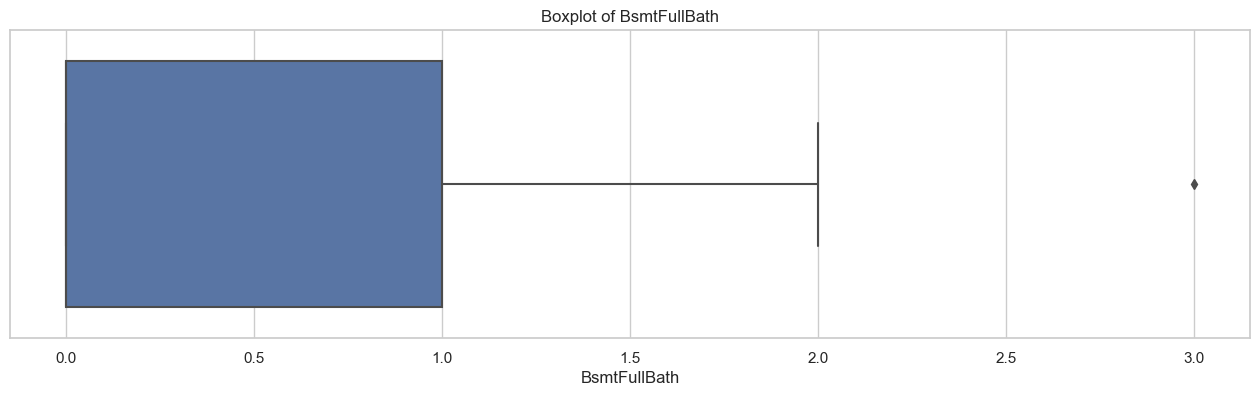

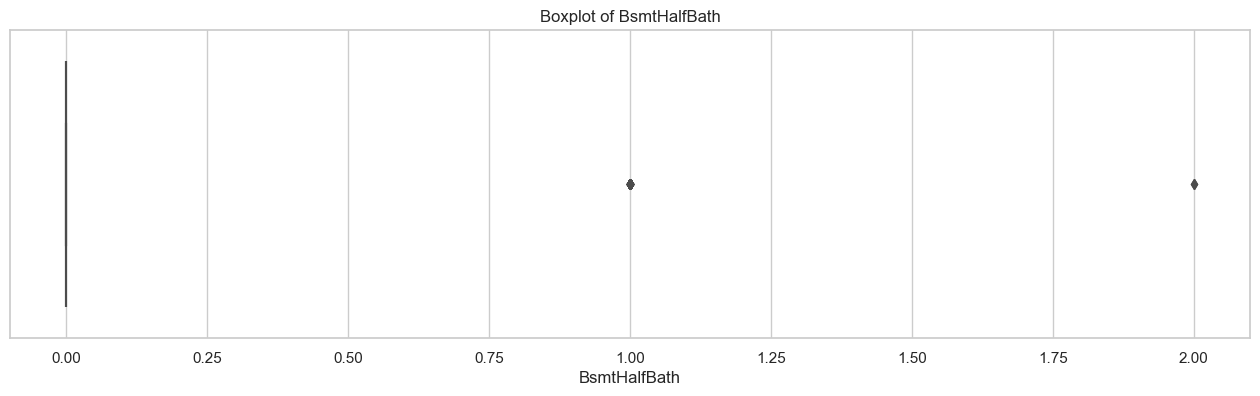

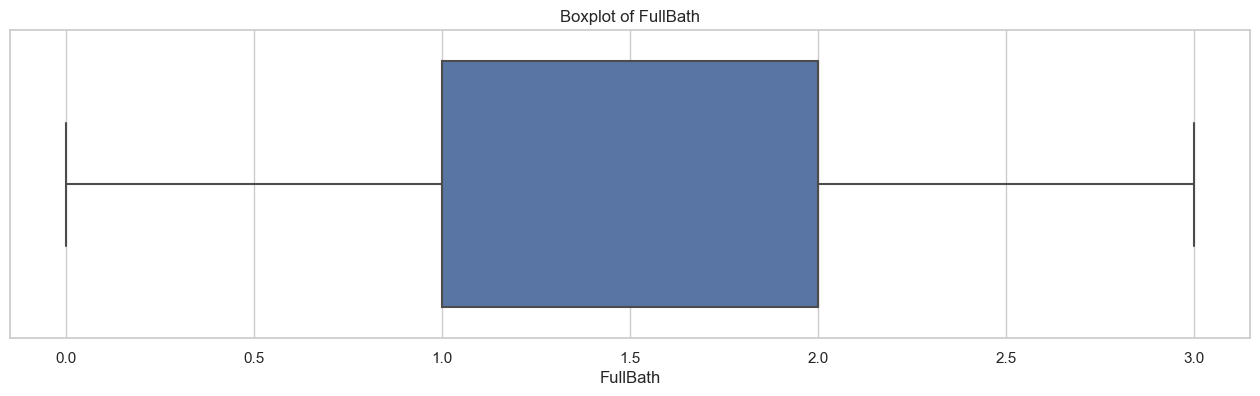

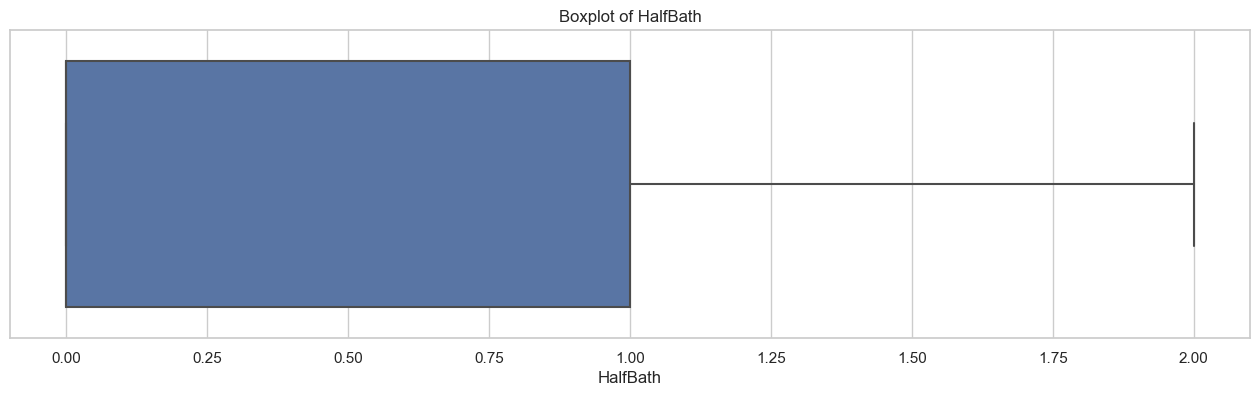

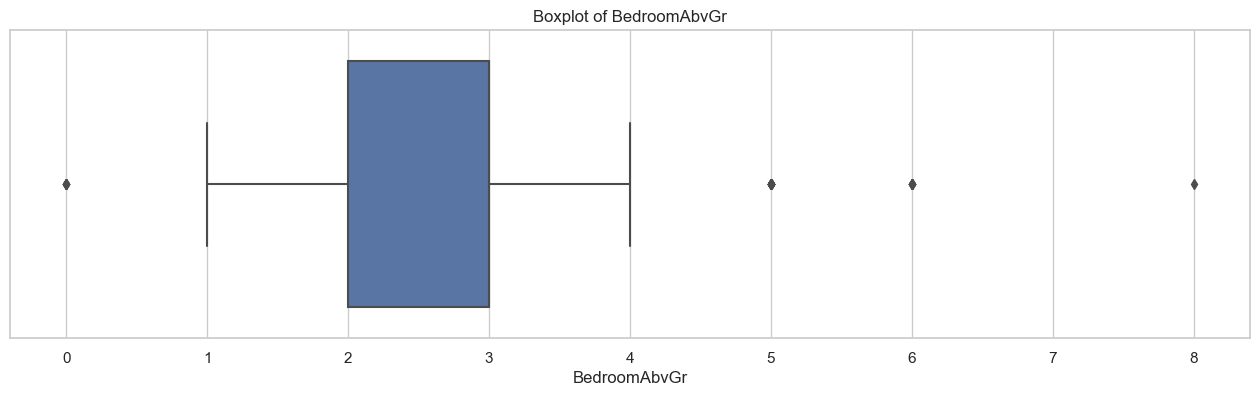

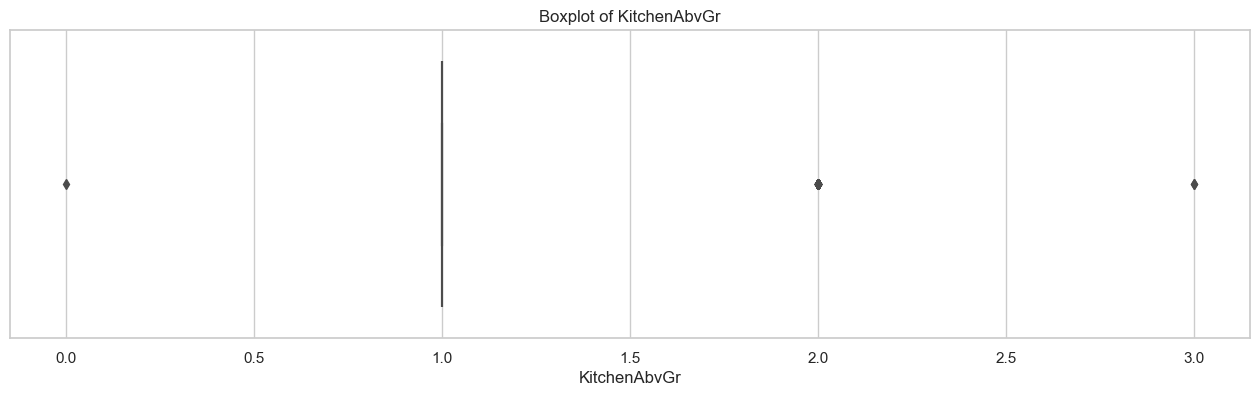

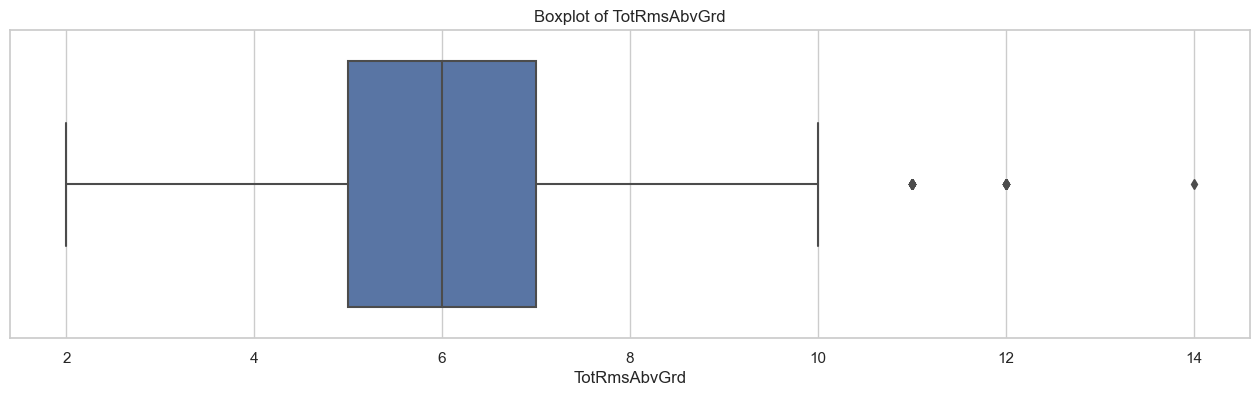

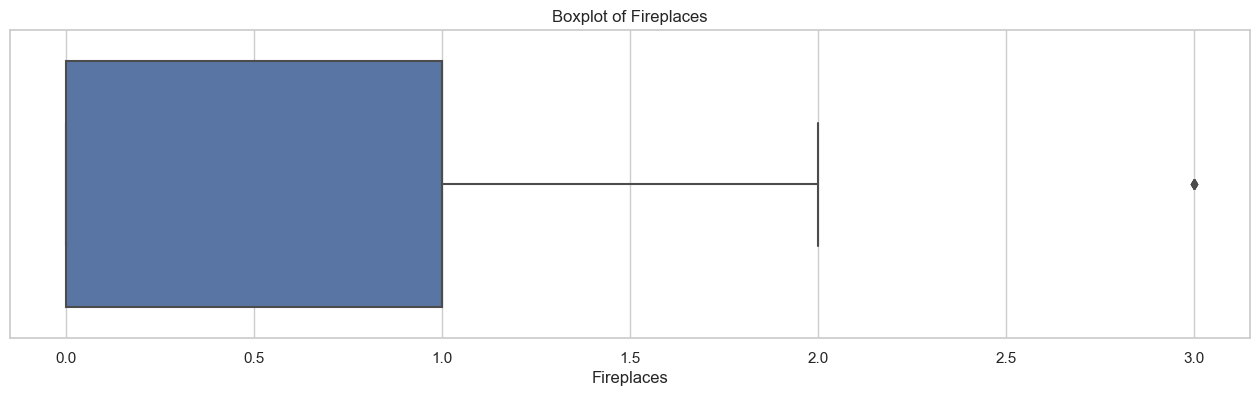

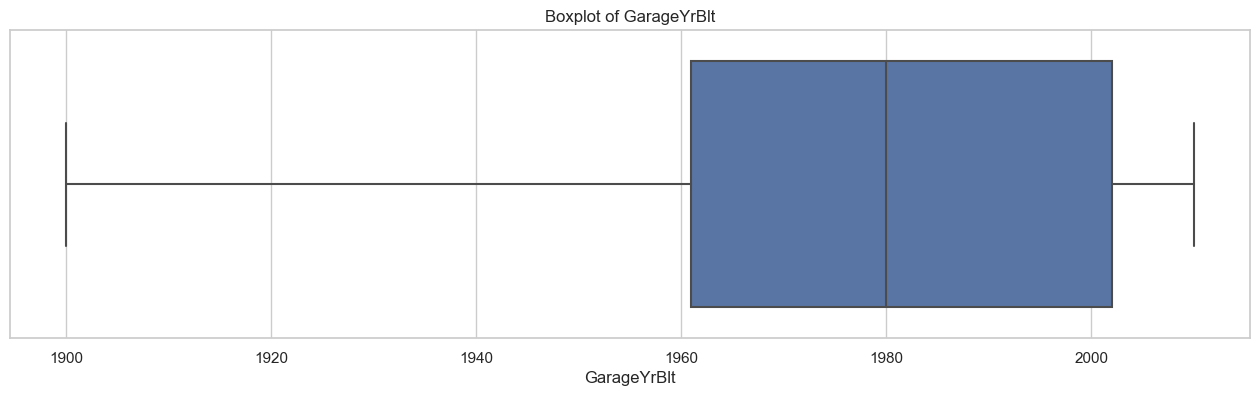

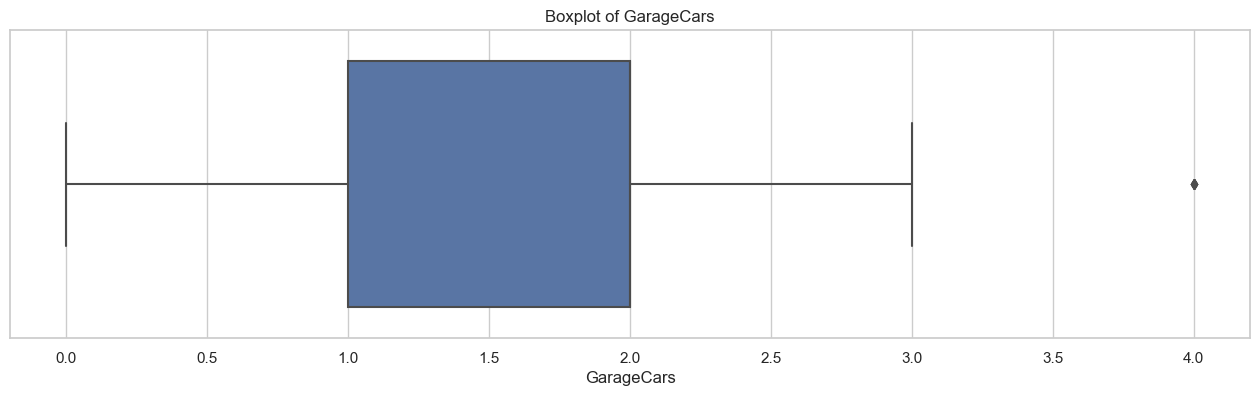

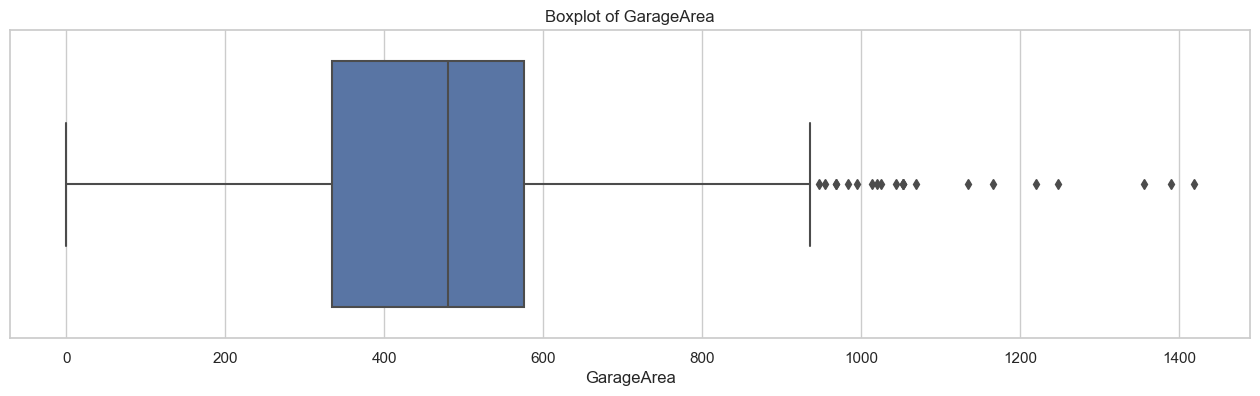

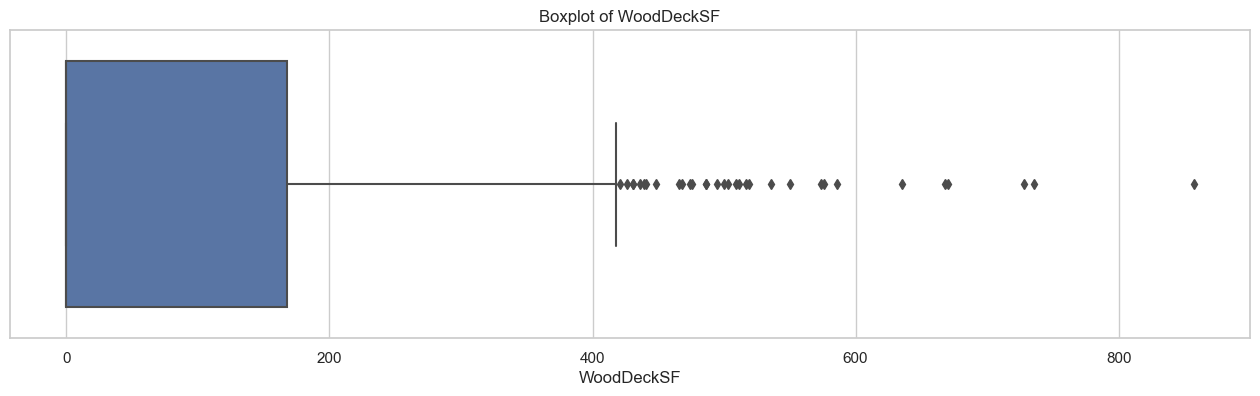

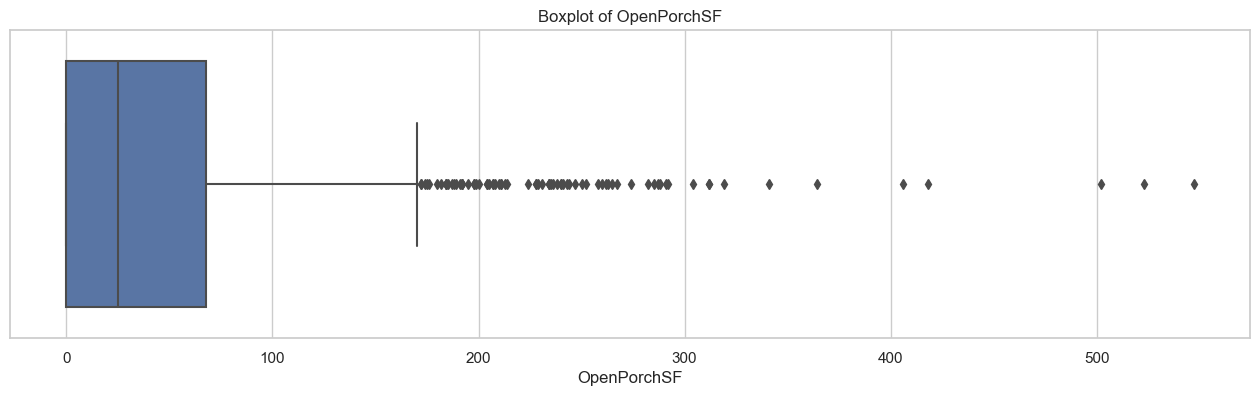

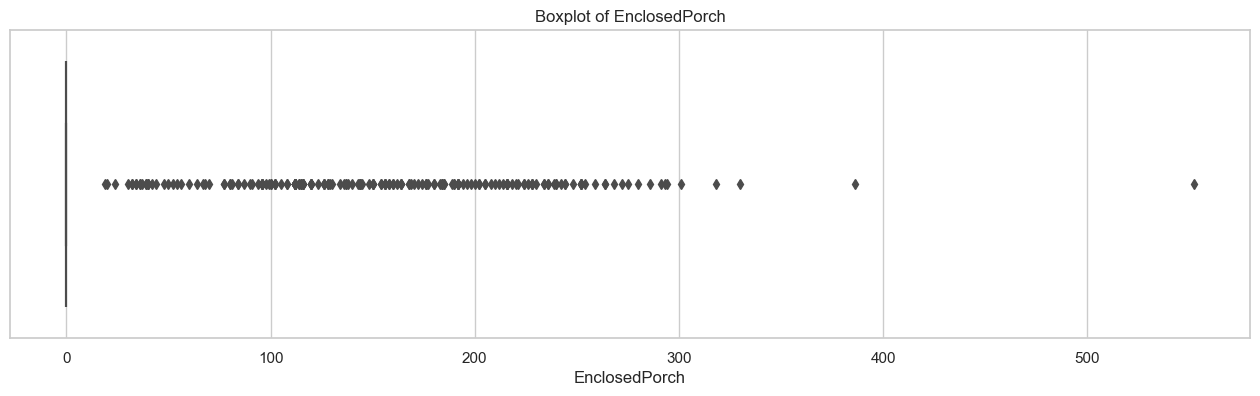

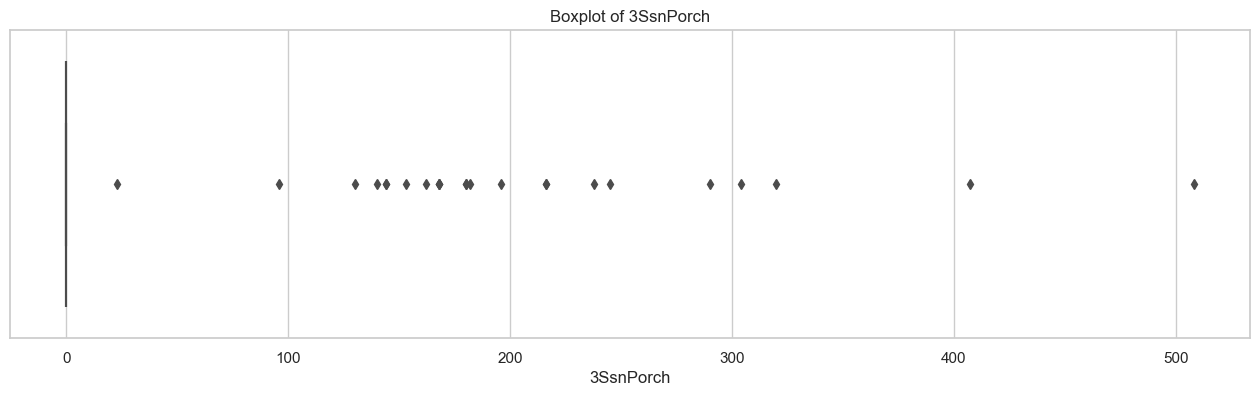

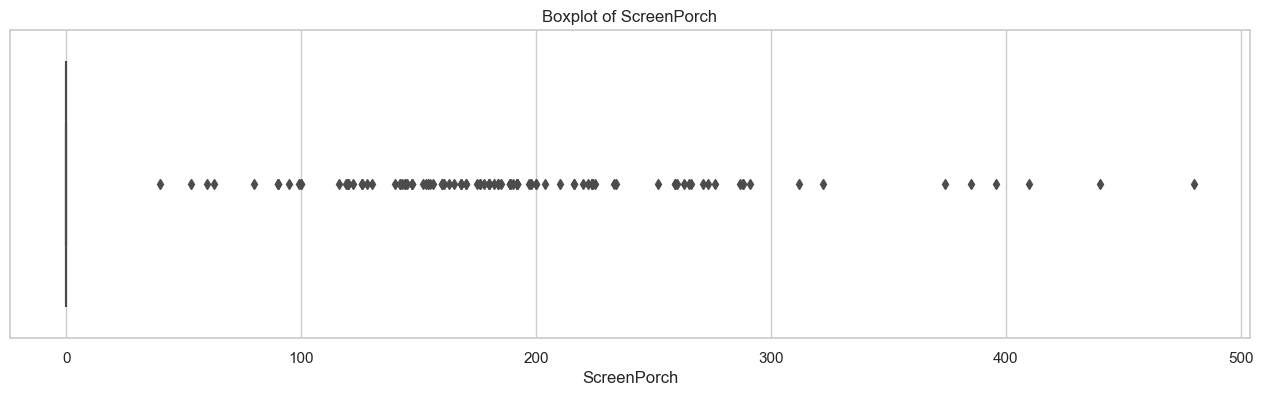

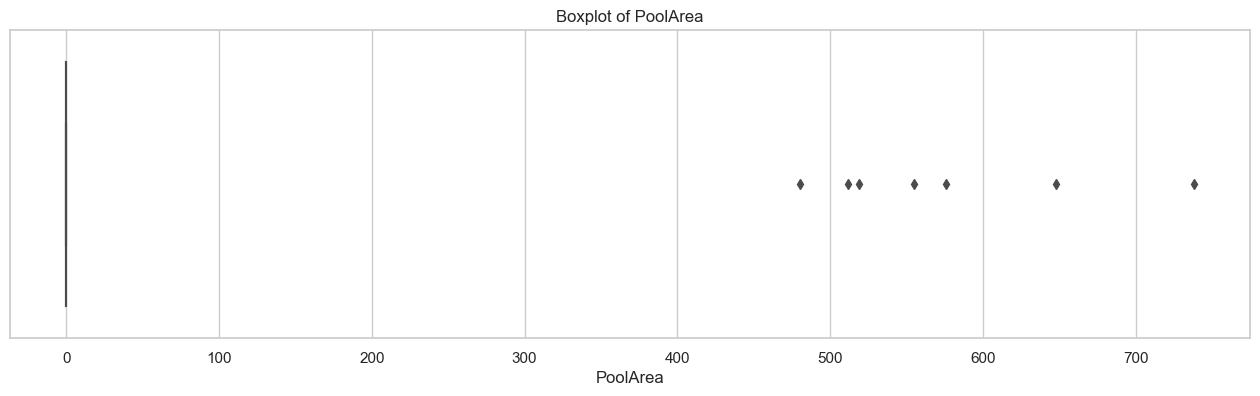

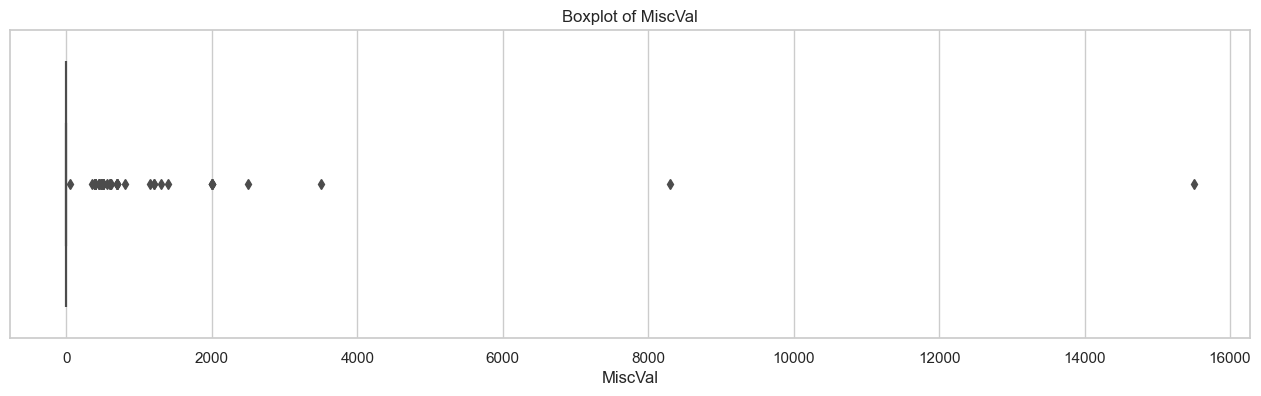

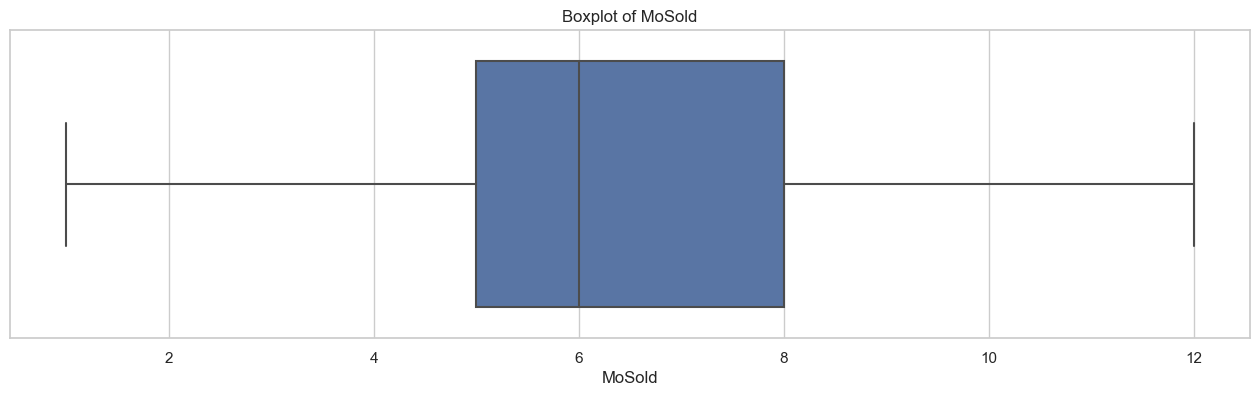

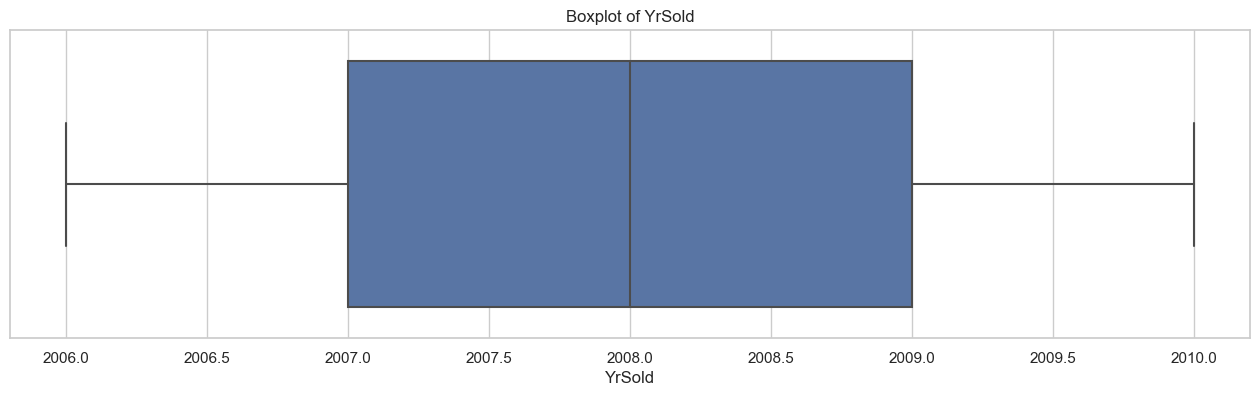

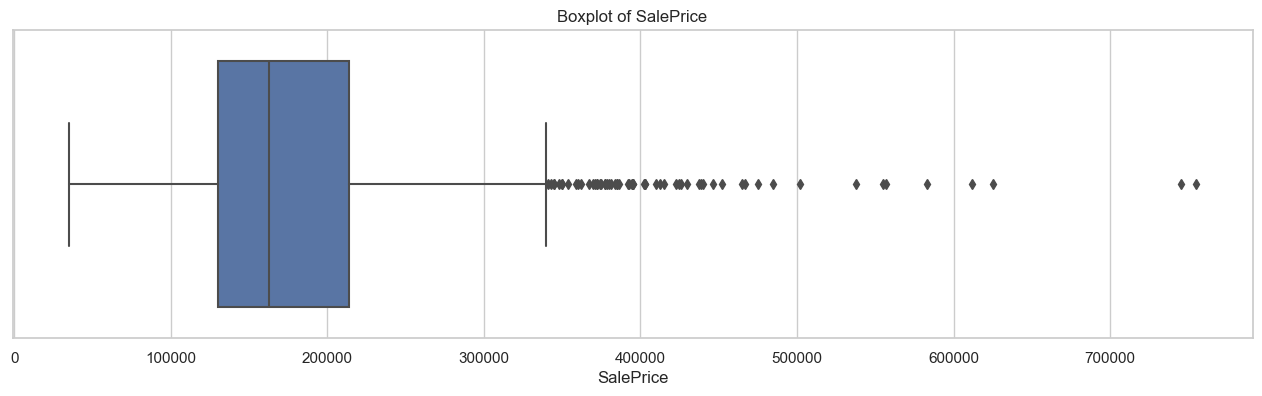

In [8]:
# Finding the outliers for all the numerical dataset before handling missing values.
numerical_df = df_train.select_dtypes(exclude=['object'])
numerical_df = numerical_df.drop(["Id"], axis=1)

for column in numerical_df:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(x=numerical_df[column])  # Added x parameter to specify the data for the boxplot
    plt.title(f'Boxplot of {column}')
    plt.show()

We won't delete the rows containing the outliers as this might cause distroying some important data.

In [9]:
feature_train_not_test = [col for col in df_train.columns if col not in df_test.columns and col != 'SalePrice']

print(feature_train_not_test)

feature_test_not_train = [col for col in df_test.columns if col not in df_train.columns]

print(feature_test_not_train)

[]
[]


test and train have all the features present in their data.

## Concating the data for easier processing.

In [10]:
df=pd.concat([df_test.assign(ind="test"), df_train.assign(ind="train")])

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,ind,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,test,NaN
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,test,NaN
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,test,NaN
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2010,WD,Normal,test,NaN
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,1,2010,WD,Normal,test,NaN


In [11]:
df.info 

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

## Handling missing values:

In [12]:
# Function to get count of missing values in each column
def get_cols_with_missing_values(DataFrame):
    missing_na_columns = DataFrame.isnull().sum()
    missing_cols = missing_na_columns[missing_na_columns > 0]
    
    if not missing_cols.empty:
        print("Columns with missing values:")
        for col, count in missing_cols.items():
            print(f"{col}: {count} missing values")
    else:
        print("No missing values in any columns.")

# Example usage
get_cols_with_missing_values(df)


Columns with missing values:
MSZoning: 4 missing values
LotFrontage: 486 missing values
Alley: 2721 missing values
Utilities: 2 missing values
Exterior1st: 1 missing values
Exterior2nd: 1 missing values
MasVnrType: 1766 missing values
MasVnrArea: 23 missing values
BsmtQual: 81 missing values
BsmtCond: 82 missing values
BsmtExposure: 82 missing values
BsmtFinType1: 79 missing values
BsmtFinSF1: 1 missing values
BsmtFinType2: 80 missing values
BsmtFinSF2: 1 missing values
BsmtUnfSF: 1 missing values
TotalBsmtSF: 1 missing values
Electrical: 1 missing values
BsmtFullBath: 2 missing values
BsmtHalfBath: 2 missing values
KitchenQual: 1 missing values
Functional: 2 missing values
FireplaceQu: 1420 missing values
GarageType: 157 missing values
GarageYrBlt: 159 missing values
GarageFinish: 159 missing values
GarageCars: 1 missing values
GarageArea: 1 missing values
GarageQual: 159 missing values
GarageCond: 159 missing values
PoolQC: 2909 missing values
Fence: 2348 missing values
MiscFeature: 

There are few features that contain features with rating or quality.

In [13]:
feature_rating_Qual = [col for col in df.columns if 'Qual' in col and df[col].dtypes == 'object']
feature_rating_Cond = [col for col in df.columns if 'Cond' in col and col not in ['Condition1', 'Condition2', 'SaleCondition'] and df[col].dtypes == 'object']
feature_rating_Qu = [col for col in df.columns if 'Qu' in col and df[col].dtypes == 'object' and col not in feature_rating_Qual]
feature_rating_QC = [col for col in df.columns if 'QC' in col and df[col].dtypes == 'object']

cat_feature_with_rating = feature_rating_Qual + feature_rating_Cond + feature_rating_Qu + feature_rating_QC

for feature in cat_feature_with_rating:
    print(feature)

ExterQual
BsmtQual
KitchenQual
GarageQual
ExterCond
BsmtCond
GarageCond
FireplaceQu
HeatingQC
PoolQC


In [14]:
# Function to select columns from a DataFrame
def select_columns(dataframe, columns):
    """
    Select columns from a DataFrame.
    
    Parameters:
    dataframe (pd.DataFrame): The DataFrame to select columns from.
    columns (list): A list of column names to select.
    
    Returns:
    pd.DataFrame: A DataFrame containing the selected columns.
    """
    return dataframe[columns]

# Usage example:
cat_feature_with_legit_na = ['Alley', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'Fence', 'MiscFeature']
df_legit_na = select_columns(df, cat_feature_with_legit_na)
df_legit_na.head()

,Alley,BsmtExposure,BsmtFinType1,BsmtFinType2,GarageType,GarageFinish,Fence,MiscFeature
0,NaN,No,Rec,LwQ,Attchd,Unf,MnPrv,NaN
1,NaN,No,ALQ,Unf,Attchd,Unf,NaN,Gar2
2,NaN,No,GLQ,Unf,Attchd,Fin,MnPrv,NaN
3,NaN,No,GLQ,Unf,Attchd,Fin,NaN,NaN
4,NaN,No,ALQ,Unf,Attchd,RFn,NaN,NaN


We will replace the values with NaN in it with the word 'Missing'.
As having a missing value in these features makes sense.

In [15]:
df_legit_na_filled = df_legit_na.fillna("Missing")

# Update the original DataFrame with filled values
df[cat_feature_with_legit_na] = df_legit_na_filled

# Making sure the missing values have been handled
print(get_cols_with_missing_values(df[cat_feature_with_legit_na]))
df_legit_na_filled.head()

No missing values in any columns.
None


,Alley,BsmtExposure,BsmtFinType1,BsmtFinType2,GarageType,GarageFinish,Fence,MiscFeature
0,Missing,No,Rec,LwQ,Attchd,Unf,MnPrv,Missing
1,Missing,No,ALQ,Unf,Attchd,Unf,Missing,Gar2
2,Missing,No,GLQ,Unf,Attchd,Fin,MnPrv,Missing
3,Missing,No,GLQ,Unf,Attchd,Fin,Missing,Missing
4,Missing,No,ALQ,Unf,Attchd,RFn,Missing,Missing


In the remaining categorical features we will replace the missing values with the mode.

In [16]:
categorical_cols = [cname for cname in df.columns if df[cname].dtypes == 'object' and cname != 'ind']
remaining_cat_cols = [cname for cname in categorical_cols if cname not in df_legit_na]

# Handling Missing Values in Categorical features by replacing them with the feature mode value
for col in remaining_cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In the numerical features with missing values, we will replace the missing values with the mean.

In [17]:
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]

df[numerical_cols]=df[numerical_cols].fillna(df[numerical_cols].mean())

In [18]:
#Select categorical columns with low cardinality
categorical_cols=[cname for cname in df.columns if df[cname].dtypes=='object' and df[cname].nunique()<10]
numerical_cols=[cname for cname in df.columns if df[cname].dtypes!='object']

# Keep selected columns only
my_cols = numerical_cols + categorical_cols

df_clean = df[my_cols].copy()

## Handling each feature.

In [19]:
df_clean['GarageYrBlt'] = df_clean['GarageYrBlt'].astype('int')
df_clean['GarageYrBlt'] = df_clean['YrSold'] - df_clean['GarageYrBlt']
df_clean['YearBuilt'] = df_clean['YrSold'] - df_clean['YearBuilt']
df_clean['YearRemodAdd'] = df_clean['YrSold'] - df_clean['YearRemodAdd']
df_clean.drop(["YrSold"], axis=1, inplace=True)
df_clean.drop(["MoSold"], axis=1, inplace=True)

In [20]:
#Drop 'Id' feature as it is not important
df_clean.drop('Id', axis=1, inplace=True)

In [21]:
# Drop the column "TotalBsmtSF"
df_clean.drop(["TotalBsmtSF"], axis=1, inplace=True)

# Create a new column "BsmtFinSF" by summing the columns "BsmtFinSF1" and "BsmtFinSF2"
df_clean['BsmtFinSF'] = df_clean['BsmtFinSF1'] + df_clean['BsmtFinSF2']

# Drop the columns "BsmtFinSF1" and "BsmtFinSF2"
df_clean.drop(["BsmtFinSF1", "BsmtFinSF2"], axis=1, inplace=True)

# Create a new column "TotalFlrSF" by summing the columns "1stFlrSF" and "2ndFlrSF"
df_clean['TotalFlrSF'] = df_clean['1stFlrSF'] + df_clean['2ndFlrSF']

# Drop the columns "1stFlrSF" and "2ndFlrSF"
df_clean.drop(["1stFlrSF", "2ndFlrSF"], axis=1, inplace=True)


In [22]:
df_clean['Total_Bath'] = (df_clean['FullBath'] 
                          + (0.5 * df_clean['HalfBath']) 
                          + df_clean['BsmtFullBath'] 
                          + (0.5 * df_clean['BsmtHalfBath']))

df_clean.drop(["FullBath", "HalfBath", "BsmtFullBath", "BsmtHalfBath"], axis=1, inplace=True)


In [23]:
numerical_cols = [cname for cname in df_clean.columns if df_clean[cname].dtypes != 'object' and cname != 'SalePrice']
skew_df = pd.DataFrame(numerical_cols, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(df_clean[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df


,Feature,Skew,Absolute Skew,Skewed
0,MSSubClass,1.375457,1.375457,True
1,LotFrontage,1.645574,1.645574,True
2,LotArea,12.822431,12.822431,True
3,OverallQual,0.197110,0.197110,False
4,OverallCond,0.570312,0.570312,True
5,YearBuilt,0.598609,0.598609,True
6,YearRemodAdd,0.450226,0.450226,False
7,MasVnrArea,2.611549,2.611549,True
8,BsmtUnfSF,0.919508,0.919508,True
9,LowQualFinSF,12.088761,12.088761,True


In [24]:
df_clean[numerical_cols].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,LowQualFinSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,BsmtFinSF,TotalFlrSF,Total_Bath
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,36.479959,23.528263,102.201312,560.772104,4.694416,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,491.005483,1496.065433,2.218712
std,42.517628,21.312345,7886.996359,1.409947,1.113131,30.336182,20.892061,178.626089,439.468337,46.396825,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,477.123276,503.675790,0.808943
min,20.000000,21.000000,1300.000000,1.000000,1.000000,-1.000000,-2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,1.000000
25%,20.000000,60.000000,7478.000000,5.000000,5.000000,7.000000,4.000000,0.000000,220.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1120.000000,1.500000
50%,50.000000,69.305795,9453.000000,6.000000,5.000000,35.000000,15.000000,0.000000,467.000000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,458.000000,1440.000000,2.000000
75%,70.000000,78.000000,11570.000000,7.000000,6.000000,54.500000,43.000000,163.500000,805.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,805.500000,1742.500000,2.500000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,136.000000,60.000000,1600.000000,2336.000000,1064.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,5644.000000,5642.000000,7.000000


As there are features whose minimum value is 0, we can't use log(x) as log(0) is infinity, so we will apply log(x+1)

In [25]:
# Get numerical columns excluding 'SalePrice'
numerical_cols = df_clean.select_dtypes(include=np.number).columns.drop('SalePrice')

# Calculate skewness for each numerical feature
skewness = df_clean[numerical_cols].apply(lambda x: skew(x))

# Filter features with skewness greater than 0.5
skewed_features = skewness[skewness > 0.5].index

# Apply log transformation to skewed features
df_clean[skewed_features] = np.log1p(df_clean[skewed_features])

In [26]:
df_clean[cat_feature_with_rating]

,ExterQual,BsmtQual,KitchenQual,GarageQual,ExterCond,BsmtCond,GarageCond,FireplaceQu,HeatingQC,PoolQC
0,TA,TA,TA,TA,TA,TA,TA,Gd,TA,Ex
1,TA,TA,Gd,TA,TA,TA,TA,Gd,TA,Ex
2,TA,Gd,TA,TA,TA,TA,TA,TA,Gd,Ex
3,TA,TA,Gd,TA,TA,TA,TA,Gd,Ex,Ex
4,Gd,Gd,Gd,TA,TA,TA,TA,Gd,Ex,Ex
...,...,...,...,...,...,...,...,...,...,...
1455,TA,Gd,TA,TA,TA,TA,TA,TA,Ex,Ex
1456,TA,Gd,TA,TA,TA,TA,TA,TA,TA,Ex
1457,Ex,TA,Gd,TA,Gd,Gd,TA,Gd,Ex,Ex
1458,TA,TA,Gd,TA,TA,TA,TA,Gd,Gd,Ex


In [27]:
for col in cat_feature_with_rating:
    if 'Missing' in df_clean[col].value_counts().index:
        df_clean[col] = df_clean[col].map({"Missing":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})
    else:
        df_clean[col] = df_clean[col].map({"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})
df_clean

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,LowQualFinSF,...,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,ind,BsmtFinSF,TotalFlrSF,Total_Bath
0,3.044522,4.394449,9.360741,5,1.945910,3.912023,49,0.000000,5.602119,0.0,...,Y,5,MnPrv,Missing,WD,Normal,test,6.418365,6.799056,1.0
1,3.044522,4.406719,9.565775,6,1.945910,3.970292,52,4.691348,6.008813,0.0,...,Y,5,Missing,Gar2,WD,Normal,test,6.828712,7.192934,1.5
2,4.110874,4.317488,9.534668,5,1.791759,2.639057,12,0.000000,4.927254,0.0,...,Y,5,MnPrv,Missing,WD,Normal,test,6.674561,7.396335,2.5
3,4.110874,4.369448,9.208238,6,1.945910,2.564949,12,3.044522,5.783825,0.0,...,Y,5,Missing,Missing,WD,Normal,test,6.401917,7.380879,2.5
4,4.795791,3.784190,8.518392,8,1.791759,2.944439,18,0.000000,6.925595,0.0,...,Y,5,Missing,Missing,WD,Normal,test,5.575949,7.155396,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,4.143135,8.976894,6,1.791759,2.197225,7,0.000000,6.860664,0.0,...,Y,5,Missing,Missing,WD,Normal,train,0.000000,7.407318,2.5
1456,3.044522,4.454347,9.486152,6,1.945910,3.496508,22,4.787492,6.380123,0.0,...,Y,5,MnPrv,Missing,WD,Normal,train,6.860664,7.637234,3.0
1457,4.262680,4.204693,9.109746,7,2.302585,4.248495,4,0.000000,6.777647,0.0,...,Y,5,GdPrv,Shed,WD,Normal,train,5.620401,7.758333,2.0
1458,3.044522,4.234107,9.181735,5,1.945910,4.110874,14,0.000000,0.000000,0.0,...,Y,5,Missing,Missing,WD,Normal,train,6.983790,6.983790,2.0


In [28]:
df_clean[cat_feature_with_legit_na]

,Alley,BsmtExposure,BsmtFinType1,BsmtFinType2,GarageType,GarageFinish,Fence,MiscFeature
0,Missing,No,Rec,LwQ,Attchd,Unf,MnPrv,Missing
1,Missing,No,ALQ,Unf,Attchd,Unf,Missing,Gar2
2,Missing,No,GLQ,Unf,Attchd,Fin,MnPrv,Missing
3,Missing,No,GLQ,Unf,Attchd,Fin,Missing,Missing
4,Missing,No,ALQ,Unf,Attchd,RFn,Missing,Missing
...,...,...,...,...,...,...,...,...
1455,Missing,No,Unf,Unf,Attchd,RFn,Missing,Missing
1456,Missing,No,ALQ,Rec,Attchd,Unf,MnPrv,Missing
1457,Missing,No,GLQ,Unf,Attchd,RFn,GdPrv,Shed
1458,Missing,Mn,GLQ,Rec,Attchd,Unf,Missing,Missing


In [29]:
#Exclude 'Alley', MiscFeature' and 'GarageType' feature as they are not ordinal
df_clean['BsmtExposure'] = df_clean['BsmtExposure'].map({"Missing":0,"No":1,"Mn":2,"Av":3,"Gd":4}).astype('int')
df_clean['BsmtFinType1'] = df_clean['BsmtFinType1'].map({"Missing":0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6}).astype('int')
df_clean['BsmtFinType2'] = df_clean['BsmtFinType2'].map({"Missing":0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6}).astype('int')
df_clean['GarageFinish'] = df_clean['GarageFinish'].map({"Missing":0,"Unf":1,"RFn":2,"Fin":3}).astype('int')
df_clean['Fence'] = df_clean['Fence'].map({"Missing":0,"MnWw":1,"GdWo":2,"MnPrv":3,"GdPrv":4}).astype('int')

In [30]:
df_clean['LotShape'] = df_clean['LotShape'].map({"IR3":1,"IR2":2,"IR1":3,"Reg":4}).astype('int')
df_clean['LandContour'] = df_clean['LandContour'].map({"Low":1,"Bnk":2,"HLS":3,"Lvl":4}).astype('int')
df_clean['Utilities'] = df_clean['Utilities'].map({"ELO":1,"NoSeWa":2,"NoSewr":3,"AllPub":4}).astype('int')
df_clean['LandSlope'] = df_clean['LandSlope'].map({"Sev":1,"Mod":2,"Gtl":3}).astype('int')
df_clean['CentralAir'] = df_clean['CentralAir'].map({"N":0,"Y":1}).astype('int')
df_clean['PavedDrive'] = df_clean['PavedDrive'].map({"N":0,"P":1,"Y":2}).astype('int')


In [31]:
cat_remaining_to_encode = [col for col in df_clean.columns if df_clean[col].dtypes=='object' and col !='ind']
print(cat_remaining_to_encode)

['MSZoning', 'Street', 'Alley', 'LotConfig', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']


In [32]:
df_clean_dummies = pd.get_dummies(df_clean[cat_remaining_to_encode],drop_first=True)
df_clean.drop(cat_remaining_to_encode,axis=1,inplace=True)
df_clean = pd.concat([df_clean,df_clean_dummies],axis=1)

## Split test and train again

In [33]:
df_test, df_train= df_clean[df_clean["ind"].eq("test")], df_clean[df_clean["ind"].eq("train")]
df_test.drop(["SalePrice", "ind"], axis=1, inplace=True)
df_train.drop(["ind"], axis=1, inplace=True)

In [34]:
log_target = np.log(df_train['SalePrice'])

df_train.drop(["SalePrice"], axis=1, inplace=True)

## Using Catboost and XGBoost algorithms

In [50]:
# Define the parameters for CatBoost and XGBoost
catboost_params = {
    'iterations': 5000,
    'learning_rate': 0.02,
    'depth': 4,
    'eval_metric':'RMSE',
    'early_stopping_rounds': 20
}

xgboost_params = {
    'n_estimators': 5000,
    'learning_rate': 0.02,
    'colsample_bytree': 0.5,
    'subsample': 0.5,
    'min_child_weight': 2,
    'early_stopping_rounds': 20   
}

In [51]:
# Define the models
models = {
    "catboost": CatBoostRegressor(**catboost_params, verbose=0),
    "xgb": XGBRegressor(**xgboost_params)
}

In [52]:
# Perform K-Fold cross-validation manually
results = {}
kf = KFold(n_splits=10)
for name, model in models.items():
    results[name] = []
    for train_index, val_index in kf.split(df_train):
        X_train, X_val = df_train.iloc[train_index], df_train.iloc[val_index]
        y_train, y_val = log_target.iloc[train_index], log_target.iloc[val_index]
        
        # For CatBoost, we can directly fit with early stopping
        if name == "catboost":
            model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=0)
            result = model.best_score_['validation']['RMSE']
        # For XGBoost, we need to manually handle early stopping
        elif name == "xgb":
            model.fit(X_train, y_train, eval_metric='rmse', eval_set=[(X_val, y_val)], verbose=False)
            # For XGBoost, the best score is directly accessible as a float
            result = model.best_score
        
        results[name].append(result)

In [53]:
# Evaluate the models
for name, result in results.items():
    print("----------\n" + name)
    print(np.mean(result))
    print(np.std(result))


----------
catboost
0.12534932894832196
0.018937616381016965
----------
xgb
0.12449707635890175
0.01896139294239652


In [54]:
# Combine predictions
final_predictions = (
    0.5 * np.exp(models['catboost'].predict(df_test)) +
    0.5 * np.exp(models['xgb'].predict(df_test))
)

In [56]:
# Save test predictions to file
output = pd.DataFrame({'Id': df_test.index+1461,
                       'SalePrice': final_predictions})
output.to_csv('submission.csv', index=False)